In [1]:
import numpy as np
import matplotlib.pylab as plt

## 3.1 퍼셉트론

$$
y = \left \{
    \begin{array}\\
        0 & \mbox{if } w_1x_1 + w_2x_2 + b \leq 0 \\
        1 & \mbox{if } w_1x_1 + w_2x_2 + b > 0)
    \end{array}
\right.
$$

<br><br>
- #### with activation function $h(x)$<br>
\begin{equation}
y = h(w_1x_1 + w_2x_2 + b) \\
h(a) = \left \{
    \begin{array}\\
        0 & \mbox{if } a \leq 0 \\
        1 & \mbox{if } a > 0)
    \end{array}
\right.
\end{equation}<br><br>

## 3.2 활성화 함수
- Step function <br>
\begin{equation}
h(a) = \left \{
    \begin{array}\\
        0 & \mbox{if } a \leq 0 \\
        1 & \mbox{if } a > 0)
    \end{array}
\right.
\end{equation}<br>
- Sigmoid (S자 모양) function <br>
$$
h(x) = \frac{1}{1+exp(-x)} = \frac{1}{1+e^{-x}}
$$<br>
- ReLU (Rectified정류된 Linear Unit) function <br>
\begin{equation}
h(x) = \left \{
    \begin{array}\\
        x & \mbox{if } x > 0 \\
        0 & \mbox{if } a \leq 0)
    \end{array}
\right.
\end{equation}

In [2]:
# Step function
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
step_function(5)

1

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [5]:
y = -2 > 0

In [6]:
y

False

In [7]:
step_function(np.array([-2, 4]))

array([0, 1])

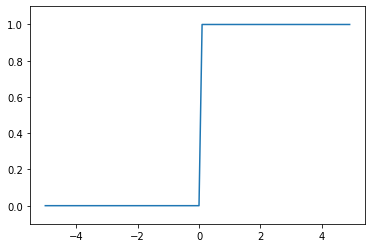

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x = np.array([-3, -1, 0, 1, 3])
sigmoid(x)

array([0.04742587, 0.26894142, 0.5       , 0.73105858, 0.95257413])

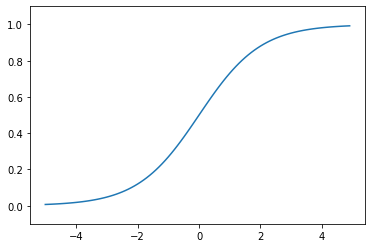

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

활성화 함수로 선형 함수 ($f(x) = ax + b$) 이용시, 신경망의 층을 깊게 하는 의미가 없어서 비선형 함수 사용.

In [12]:
def relu(x):
    return np.maximum(0, x)

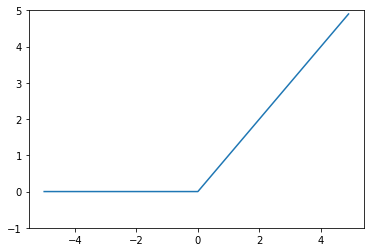

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5)
plt.show()

## 3.3 다차원 배열의 계산

In [14]:
A = np.array([1, 2, 3, 4])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [15]:
np.ndim(A) # 차원 수

1

In [16]:
np.ndim(B) # 차원 수

2

In [17]:
A.shape # 형상

(4,)

In [18]:
B.shape # 형상

(3, 2)

In [19]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
C = np.array([[3], [3]])

In [21]:
C.shape

(2, 1)

In [22]:
np.dot(B,C) # (3, 2) * (2, 1) = (3, 1)

array([[ 9],
       [21],
       [33]])

## 3.4 3층신경망

$$ x2 \to w_{1 2}^{(1)} \to a_1^{(1)} $$
- 2: 앞 층의 2번째 뉴런
- 1: 다음 층의 1번째 뉴런
- (1): 1층의 가중치

$$a_1^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)}$$ <br>
$$a_2^{(1)} = w_{21}^{(1)} x_1 + w_{22}^{(1)} x_2 + b_2^{(1)}$$ <br>
$$a_1^{(1)} = w_{31}^{(1)} x_1 + w_{32}^{(1)} x_2 + b_3^{(1)}$$ <br><br>
$$A^{(1)} = XW^{(1)} + B^{(1)}$$

\begin{equation}
A^{(1)} = (a_1^{(1)}, a_2^{(1)}, a_3^{(1)})\\
X = (x1, x2)\\
B^{(1)} = (b_1^{(1)}, b_2^{(1)}, b_3^{(1)})\\
W^{(1)} =
\begin{pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)}\\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}
\end{equation}

In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [24]:
W1

array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])

In [25]:
print('input: X \nX:', X.shape)
print('W1:', W1.shape)
print('B1:', B1.shape)

input: X 
X: (2,)
W1: (2, 3)
B1: (3,)


In [26]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [27]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [28]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print('input: Z1 \nZ1 shape:', Z1.shape)
print('W2:', W2.shape)
print('B2:', B2.shape)

input: Z1 
Z1 shape: (3,)
W2: (3, 2)
B2: (2,)


In [29]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [30]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # Y = A3
Y

array([0.31682708, 0.69627909])

In [31]:
# 3층 신경망 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    z1 = sigmoid(np.dot(x, W1) + b1)
    z2 = sigmoid(np.dot(z1, W2) + b2)
    y = identity_function(np.dot(z2, W3) + b3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 3.5 출력층 설계

- #### Softmax function:
$$
y_k = \frac{e^{(a_k)}}{\sum_{i=1}^n e^{(a_i)}}
$$
- n: 출력층 뉴런 수
- $y_k$: k번째 출력

In [34]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [35]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [36]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [41]:
t = 0
for i in y:
    t += i
t

1.0

In [42]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

- e^100 = 40자리 넘는 수. 수치 불안정으로 overflow 발생 가능.

In [44]:
a = np.array([1010, 1000, 990])
softmax(a)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

- 개선
\begin{equation}
y_k = \frac{e^{(a_k)}}{\sum_{i=1}^n e^{(a_i)}} \\
 = \frac{e^{(a_k)} + C'}{\sum_{i=1}^n e^{(a_i)} + C'}
\end{equation}

In [45]:
c = np.max(a)
softmax(a - c)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [46]:
p = 0
q = softmax(a - c)
for i in q:
    p += i
p

1.0

In [47]:
def softmax(a):
    c = np.max(a)
    return np.exp(a - c) / np.sum(np.exp(a - c))

- #### 소프트맥스 함수가 단조 증가이기 때문에 각 원소의 대소 관계에 변화 X (arg 값 같음)<br> => 학습 완료 후 모델 활용(추론)할 때는 소프트맥스 함수 생략해 지수 함수 계산에 드는 자원 낭비 줄여도 됨.


### 3.6 MNIST

In [68]:
import sys, os, pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [63]:
(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

In [62]:
print('shape \nX_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

shape 
X_train (60000, 784)
y_train (60000,)
X_test (10000, 784)
y_test (10000,)


In [58]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = X_train[0]
label = y_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [73]:
def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

predict = forward

In [74]:
X, y = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(X)):
    pred = predict(network, X[i])
    if np.argmax(pred) == y[i]:
        accuracy_cnt += 1
        
print('Accuracy: ' + str(float(accuracy_cnt) / len(X)))

Accuracy: 0.9352


In [81]:
# 각 층 가중치 형상 출력
X, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print('shape', '\n', X.shape, '\n', \
X[0].shape, '\n', \
W1.shape, '\n', \
W2.shape, '\n', \
W3.shape)

shape 
 (10000, 784) 
 (784,) 
 (784, 50) 
 (50, 100) 
 (100, 10)


In [83]:
# batch

batch_size = 100 # 한 배치 당 이미지 100장씩

X, y = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    pred_batch = predict(network, X_batch)
    p = np.argmax(pred_batch, axis=1)
    accuracy_cnt += np.sum(p == y[i:i+batch_size])
        
print('Accuracy: ' + str(float(accuracy_cnt) / len(X)))

Accuracy: 0.9352
